In [366]:
%load_ext autoreload
%autoreload 2

import os
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import alphalens as al
from utils.load_data import get_stock_price, load_preprocessor
from alphalens import performance
from alphalens import plotting
from alphalens import tears
from alphalens import utils
import sys
sys.path.append("D:/github/factor_analysis_lab")
from get_factor_analysis import *
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
start_time = pd.to_datetime('20220101')
end_time = pd.to_datetime('20220930')
stock_price = get_stock_price(start_time=start_time,end_time=end_time, price_type='adjopen')

In [47]:
factor_data = pd.read_feather('E:/google_drive/factor_database/pfactors/alphaP1015_20.feather').set_index('dt').loc[start_time:end_time - pd.DateOffset(months=1)].stack()

In [276]:
preprocessor = load_preprocessor(start_time=start_time, end_time=end_time)
del preprocessor["mv"]

mv = get_stock_price(start_time, end_time, "mv_total").stack()

preprocessor = preprocessor.stack()
preprocessor = preprocessor.loc[preprocessor != 0].sort_index()
preprocessor = (
    preprocessor.reset_index()
    .set_index(["dt", "code"])["level_2"]
    .astype("category")
)


In [279]:
factor_returns = get_clean_factor_and_forward_returns(
    factor_data=factor_data,
    price_data=stock_price.shift(-1),
    industry_info=preprocessor,
    mv_info=mv,
    n_groups=10,
)

whole_market = analyze_by_whole_market(factor_returns)
by_industry = analyze_by_industry(factor_returns)
by_mv = analyze_by_market_value(factor_returns)

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


全市场IC统计结果

,IC_mean,ICIR,IC t-value,IC prob (abs > 0.02)
1D,-0.012,-0.137,-1.730,0.881
5D,-0.018,-0.218,-2.755,0.788
10D,-0.017,-0.223,-2.819,0.800


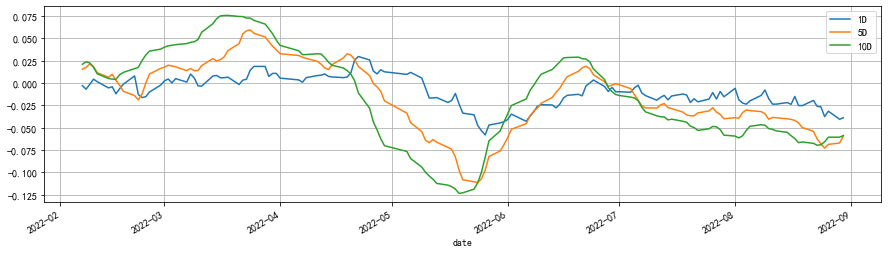

In [307]:
whole_market['ic_monthly_mean'].plot(figsize = (15, 4), grid=True)
whole_market['ic_summary'].round(3)

分行业IC统计结果

Type  IC_mean                 ICIR               IC t-value                \
           1D     5D    10D     1D     5D    10D         1D     5D    10D   
group                                                                       
综合     -0.043 -0.051 -0.076 -0.203 -0.257 -0.440     -2.567 -3.245 -5.560   
公用事业   -0.043 -0.072 -0.080 -0.243 -0.396 -0.429     -3.073 -5.008 -5.433   
美容护理   -0.033 -0.026 -0.026 -0.128 -0.112 -0.150     -1.619 -1.419 -1.898   
计算机    -0.030 -0.048 -0.055 -0.213 -0.374 -0.444     -2.699 -4.735 -5.613   
国防军工   -0.030 -0.073 -0.085 -0.185 -0.466 -0.542     -2.335 -5.893 -6.851   
通信     -0.025 -0.034 -0.032 -0.153 -0.205 -0.207     -1.931 -2.595 -2.615   
钢铁     -0.025 -0.048 -0.009 -0.102 -0.204 -0.039     -1.293 -2.575 -0.494   
交通运输   -0.024 -0.043 -0.020 -0.142 -0.234 -0.119     -1.794 -2.966 -1.507   
传媒     -0.022 -0.023 -0.008 -0.124 -0.115 -0.042     -1.573 -1.455 -0.528   
建筑装饰   -0.021 -0.048 -0.052 -0.118 -0.262 -0.294     -1.498 -3.318 -3.713   
社会服务   -0.020 -0.033 -0.059 -0.084 -0.125 -0.233     -1.065 -1.580 -2.946   
农林牧渔   -0.015 -0.008  0.004 -0.080 -0.041  0.019     -1.012 -0.513  0.239   
机械设备   -0.015 -0.022 -0.021 -0.106 -0.165 -0.141     -1.342 -2.089 -1.786   
石油石化   -0.015  0.003  0.014 -0.064  0.011  0.060     -0.814  0.133  0.763   
非银金融   -0.014 -0.043 -0.058 -0.077 -0.238 -0.306     -0.979 -3.004 -3.871   
电力设备   -0.014 -0.021 -0.023 -0.078 -0.122 -0.131     -0.990 -1.540 -1.653   
医药生物   -0.012 -0.030 -0.028 -0.082 -0.247 -0.252     -1.031 -3.122 -3.188   
电子     -0.012 -0.022 -0.021 -0.072 -0.127 -0.129     -0.916 -1.603 -1.629   
环保     -0.011 -0.018 -0.010 -0.063 -0.107 -0.060     -0.798 -1.359 -0.760   
纺织服饰   -0.011 -0.008 -0.001 -0.081 -0.054 -0.006     -1.025 -0.688 -0.076   
建筑材料   -0.008  0.000 -0.010 -0.038  0.001 -0.047     -0.478  0.010 -0.600   
基础化工   -0.007 -0.008  0.003 -0.051 -0.062  0.026     -0.641 -0.780  0.333   
轻工制造   -0.006 -0.025 -0.040 -0.042 -0.170 -0.259     -0.529 -2.149 -3.279   
汽车     -0.005 -0.001 -0.002 -0.032 -0.004 -0.011     -0.406 -0.048 -0.137   
商贸零售   -0.004 -0.010 -0.007 -0.023 -0.067 -0.045     -0.297 -0.845 -0.569   
煤炭     -0.001 -0.006  0.015 -0.005 -0.021  0.056     -0.062 -0.271  0.712   
有色金属   -0.001  0.006  0.032 -0.004  0.029  0.154     -0.056  0.364  1.951   
食品饮料    0.004  0.015 -0.005  0.019  0.077 -0.025      0.242  0.972 -0.322   
家用电器    0.006  0.031  0.046  0.028  0.149  0.191      0.351  1.888  2.414   
房地产     0.010  0.021  0.012  0.063  0.147  0.081      0.795  1.854  1.028   
银行      0.040  0.047  0.042  0.127  0.159  0.155      1.608  2.005  1.967   

Type  IC prob (abs > 0.02)                
                        1D     5D    10D  
group                                     
综合                   0.944  0.950  0.894  
公用事业                 0.925  0.950  0.950  
美容护理                 0.925  0.900  0.925  
计算机                  0.919  0.925  0.888  
国防军工                 0.881  0.919  0.925  
通信                   0.906  0.919  0.856  
钢铁                   0.950  0.938  0.888  
交通运输                 0.906  0.919  0.875  
传媒                   0.931  0.919  0.919  
建筑装饰                 0.900  0.888  0.875  
社会服务                 0.950  0.962  0.925  
农林牧渔                 0.944  0.894  0.925  
机械设备                 0.894  0.906  0.938  
石油石化                 0.969  0.962  0.956  
非银金融                 0.906  0.938  0.969  
电力设备                 0.944  0.912  0.944  
医药生物                 0.862  0.881  0.906  
电子                   0.912  0.912  0.856  
环保                   0.900  0.912  0.888  
纺织服饰                 0.869  0.875  0.906  
建筑材料                 0.962  0.919  0.888  
基础化工                 0.888  0.862  0.856  
轻工制造                 0.906  0.912  0.925  
汽车                   0.912  0.931  0.950  
商贸零售                 0.869  0.906  0.900  
煤炭                   0.950  0.900  0.944  
有色金属                 0.906  0.919  0.881  
食品饮料                 0.931  0.925  0.919  
家用电器                 0.925  0.925  0.950  
房地产  

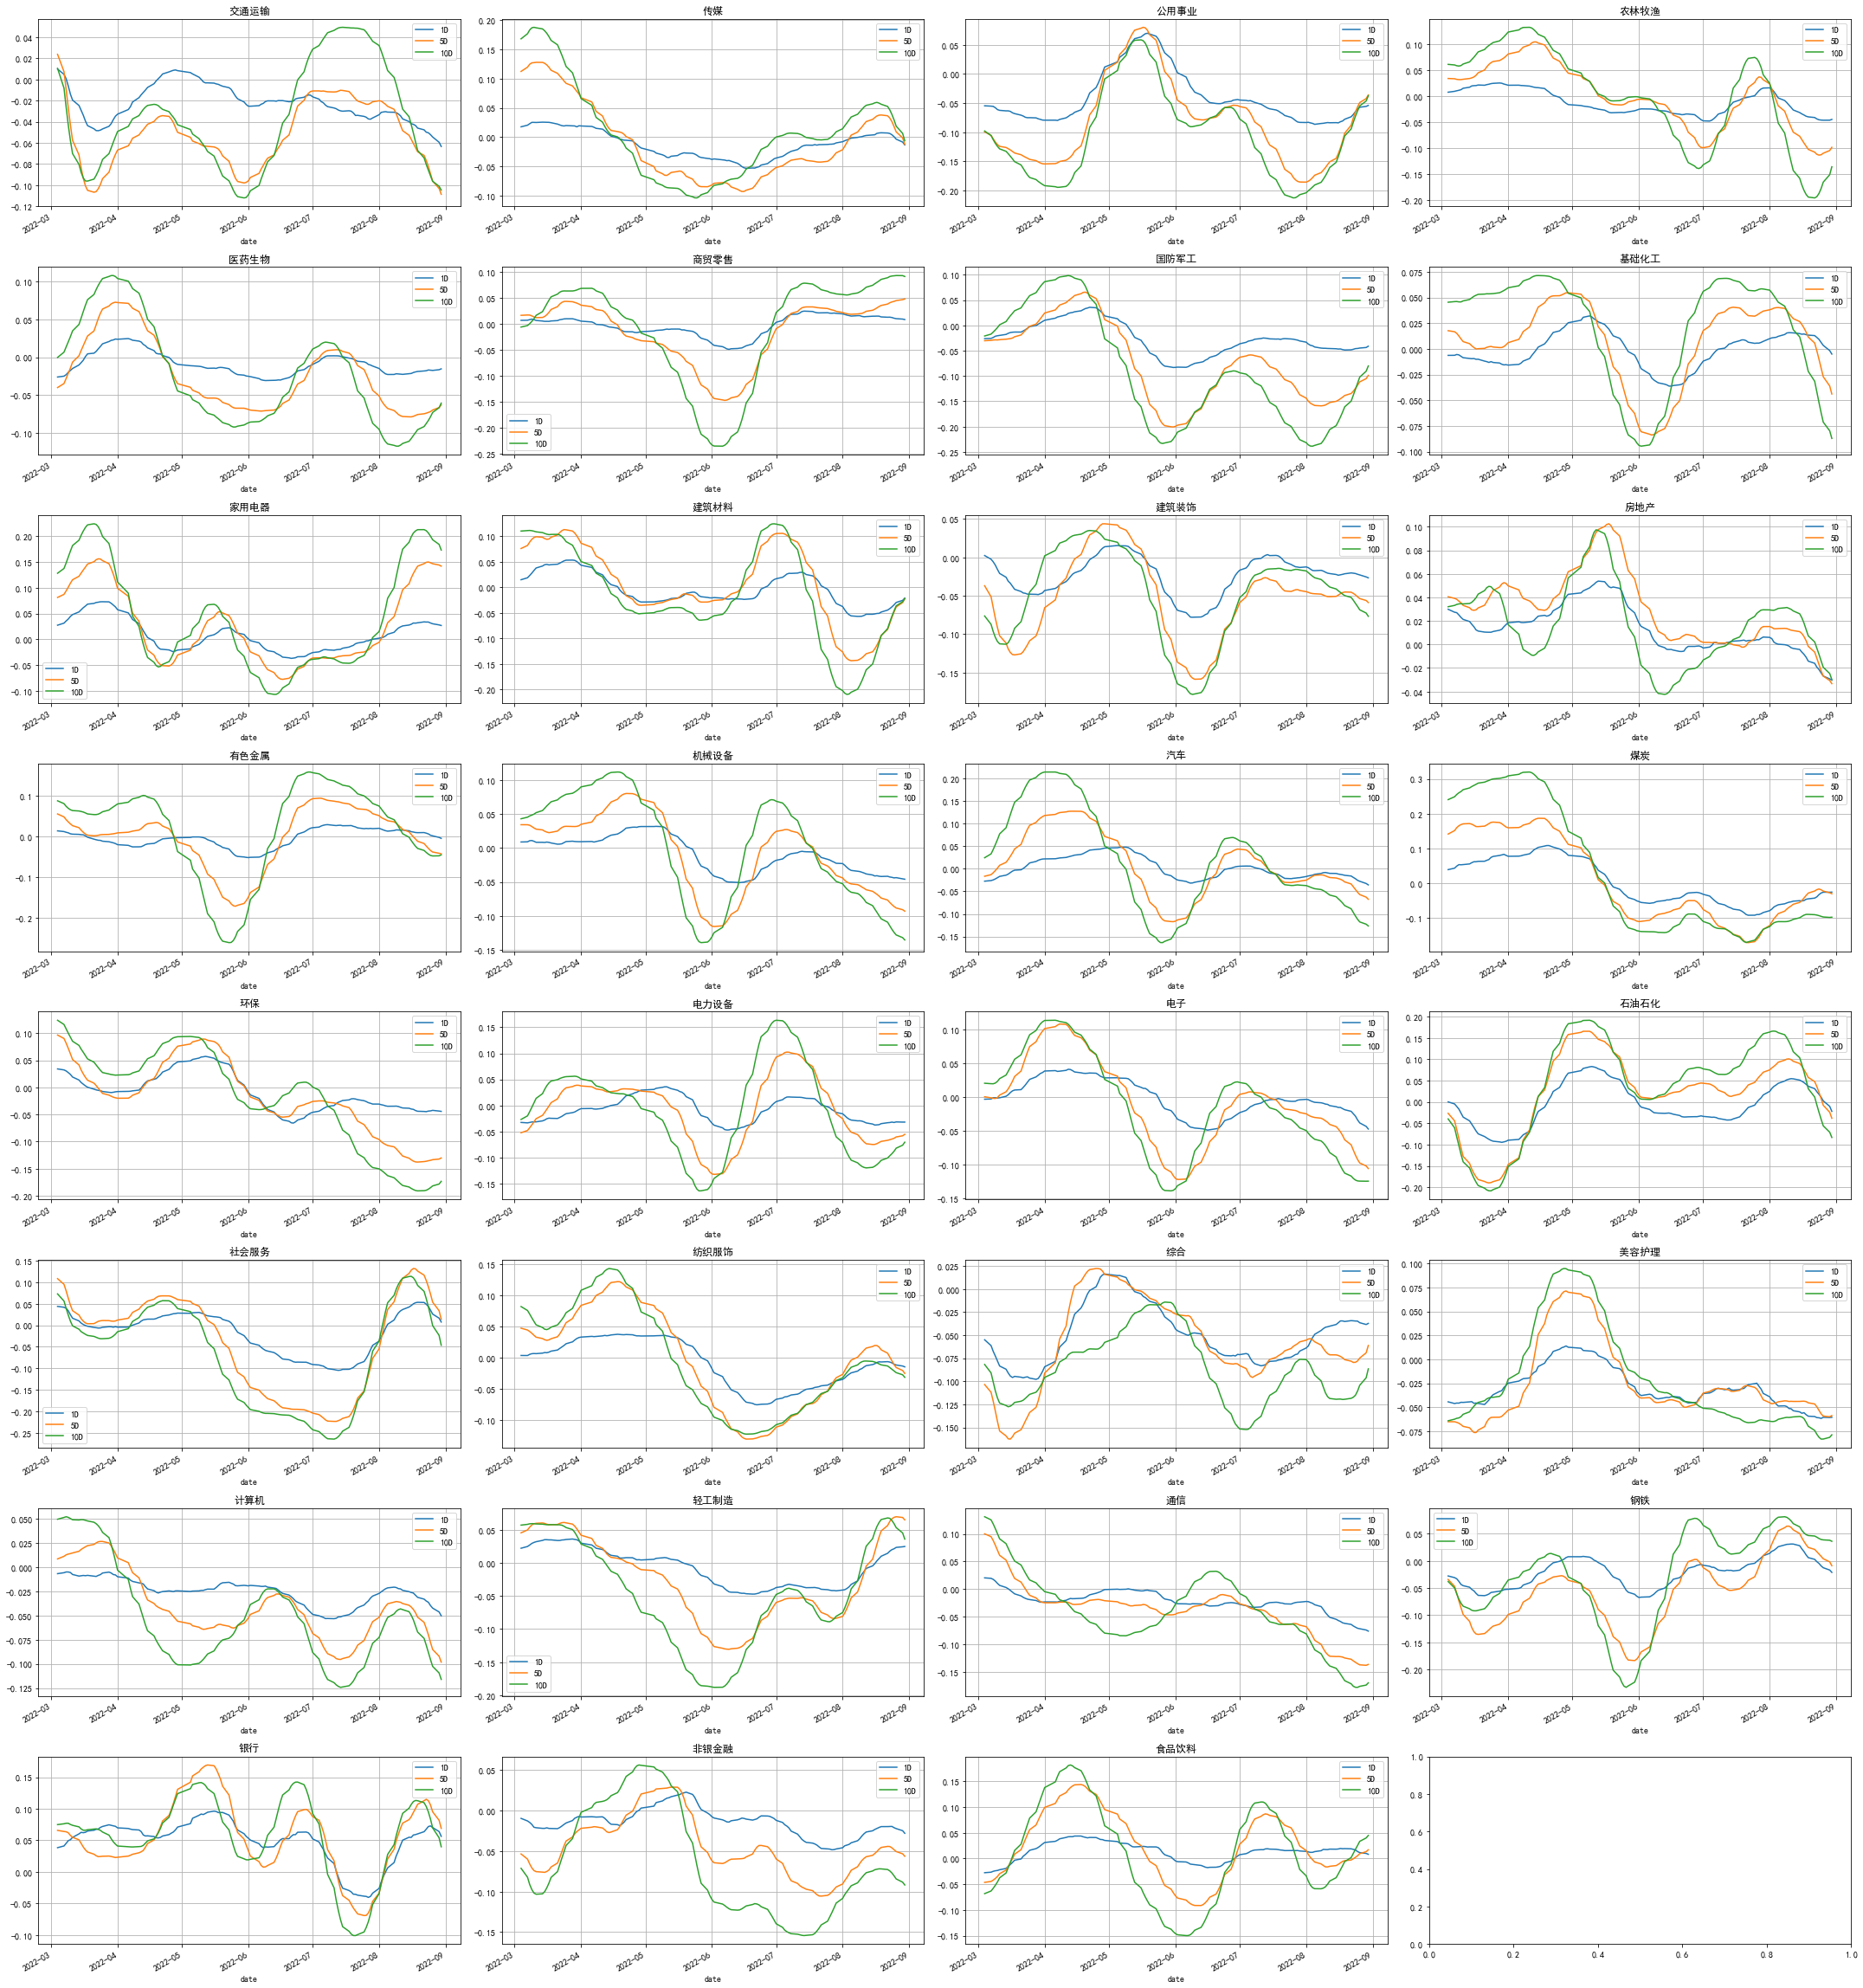

In [339]:
grouped = by_industry['ic_monthly_mean'].groupby(level = 0, group_keys=False).rolling(20).mean().dropna().droplevel([0, 3])
n_levels = len(grouped.index.levels[0].unique())
n_cols = 4
n_rows = n_levels // n_cols + 1
fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize = (30, int(4*n_rows)))
ax = ax.flatten()
for i, name in enumerate(grouped.index.levels[0].unique()):
    grouped.loc[name].plot(ax=ax[i], title = name, grid=True)
fig.tight_layout()
by_industry['ic_summary'].round(3).sort_values(tuple(['IC_mean', '1D']))

分市值IC统计结果

Type        IC_mean                 ICIR               IC t-value         \
                 1D     5D    10D     1D     5D    10D         1D     5D   
mv_quantile                                                                
Small        -0.022 -0.028 -0.028 -0.347 -0.390 -0.411     -4.385 -4.939   
Medium       -0.015 -0.027 -0.032 -0.164 -0.314 -0.416     -2.079 -3.974   
Big          -0.003 -0.008 -0.004 -0.022 -0.071 -0.035     -0.278 -0.903   

Type               IC prob (abs > 0.02)                
               10D                   1D     5D    10D  
mv_quantile                                            
Small       -5.199                0.738  0.838  0.775  
Medium      -5.263                0.850  0.819  0.794  
Big         -0.442                0.881  0.881  0.850

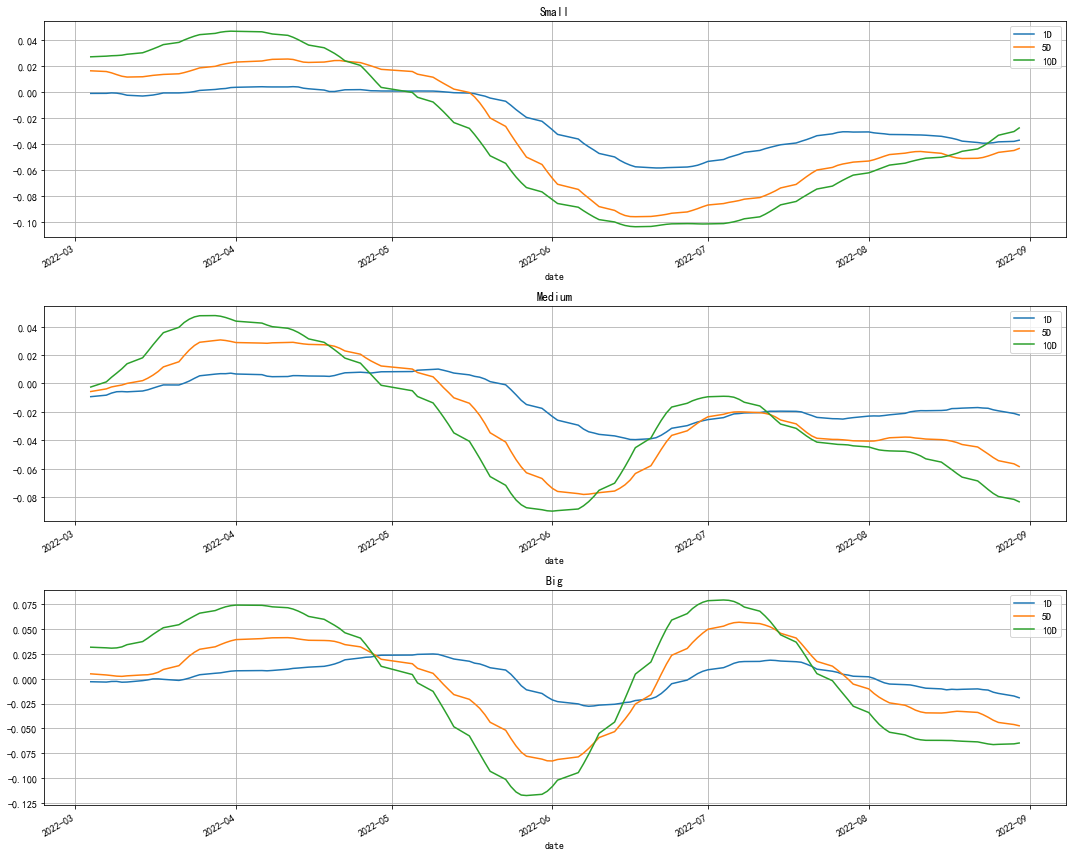

In [340]:
grouped = by_mv['ic_monthly_mean'].groupby(level = 0, group_keys=False).rolling(20).mean().dropna().droplevel([0, 3])
n_levels = len(grouped.index.levels[0].unique())
fig, ax = plt.subplots(nrows=3, ncols=1, figsize = (15, 12))
ax = ax.flatten()
for i, name in enumerate(grouped.index.levels[0].unique()):
    grouped.loc[name].plot(ax=ax[i], title = name, grid=True)
fig.tight_layout()
by_mv['ic_summary'].round(3).sort_values(tuple(['IC_mean', '1D']))

全市场分层收益情况

Type            Annual_return               Annual_vol                \
                           1D     5D    10D         1D     5D    10D   
factor_quantile                                                        
1                      -0.226 -0.214 -0.179      0.264  0.129  0.093   
2                      -0.128 -0.104 -0.104      0.254  0.122  0.086   
3                       0.005 -0.005 -0.028      0.257  0.122  0.085   
4                       0.003 -0.001 -0.015      0.258  0.123  0.087   
5                       0.029  0.009 -0.005      0.259  0.123  0.085   
6                       0.043  0.048  0.030      0.256  0.120  0.084   
7                       0.023  0.010 -0.012      0.260  0.121  0.085   
8                      -0.069 -0.060 -0.050      0.253  0.121  0.084   
9                      -0.165 -0.159 -0.148      0.251  0.116  0.082   
10                     -0.259 -0.256 -0.253      0.244  0.112  0.083   

Type            Annual_MDD               Mean_ret                
                        1D     5D    10D       1D     5D    10D  
factor_quantile                                                  
1                   -0.356 -0.321 -0.291   -0.001 -0.004 -0.006  
2                   -0.323 -0.281 -0.258   -0.000 -0.001 -0.003  
3                   -0.291 -0.258 -0.237    0.000  0.001  0.000  
4                   -0.282 -0.253 -0.227    0.000  0.001  0.001  
5                   -0.268 -0.238 -0.211    0.000  0.001  0.001  
6                   -0.239 -0.211 -0.195    0.000  0.002  0.003  
7                   -0.244 -0.212 -0.199    0.000  0.001  0.001  
8                   -0.243 -0.224 -0.203   -0.000 -0.001 -0.001  
9                   -0.276 -0.243 -0.225   -0.001 -0.003 -0.005  
10                  -0.308 -0.284 -0.274   -0.001 -0.005 -0.010

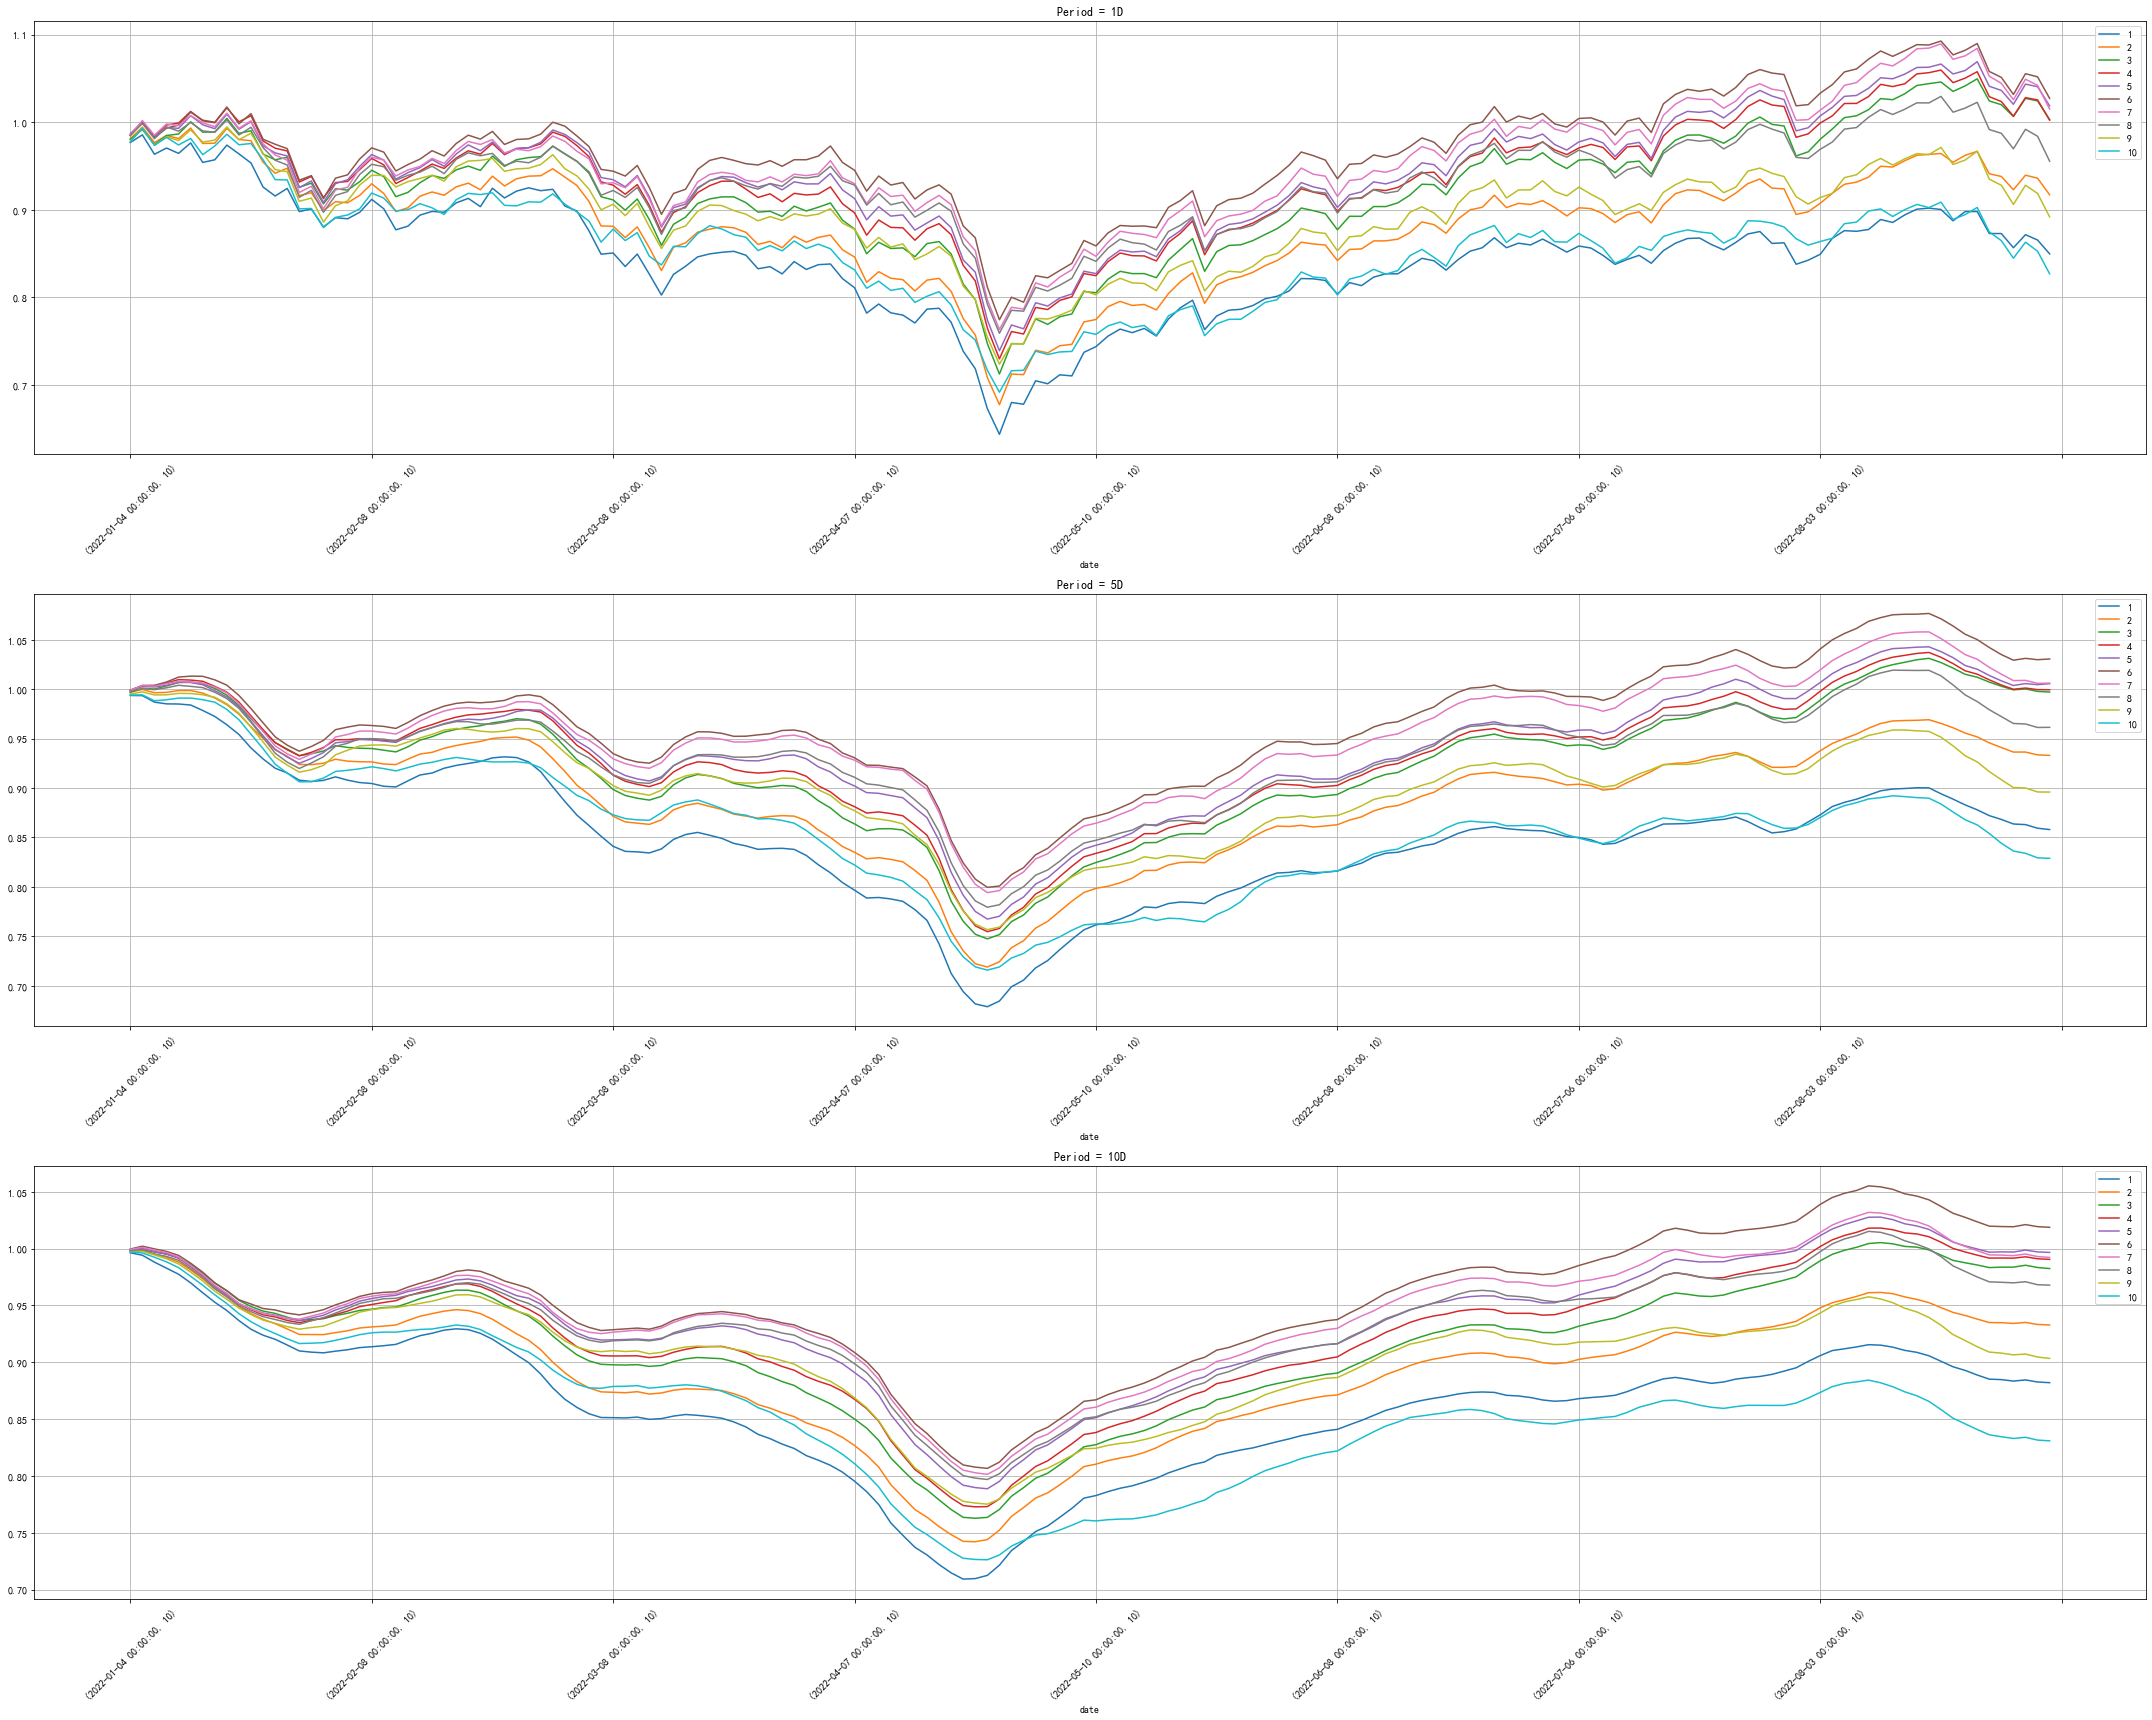

In [362]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize = (30, 24))
ax = ax.flatten()
for i, name in enumerate(whole_market['group_cum_return'].columns):
    whole_market['group_cum_return'].groupby(level = 1)[name].plot(rot=45, legend=True, grid=True, title = "Period = " + name, ax = ax[i], xlabel = 'date')
fig.tight_layout()
whole_market['group_return_summary'].round(3)

分行业分层收益情况

In [396]:
by_industry['group_return_summary'].round(3)

Type                              Annual_return               Annual_vol               Annual_MDD               Mean_ret              
                                             1D     5D    10D         1D     5D    10D         1D     5D    10D       1D     5D    10D
group factor_quantile_by_industry                                                                                                     
交通运输  0                                   0.043 -0.176 -0.260      0.285  0.121  0.091     -0.195 -0.210 -0.243    0.000 -0.003 -0.010
      1                                  -0.204 -0.099  0.023      0.334  0.129  0.085     -0.257 -0.194 -0.135   -0.001 -0.001  0.002
      2                                  -0.102  0.068  0.085      0.304  0.134  0.086     -0.199 -0.137 -0.118   -0.000  0.002  0.005
      3                                   0.445  0.578  0.337      0.279  0.131  0.081     -0.151 -0.108 -0.080    0.002  0.010  0.013
      4                                   0.547  0.286  0.274      0.255  0.107  0.077     -0.137 -0.120 -0.081    0.002  0.006  0.011
      5                                   0.118  0.188  0.227      0.267  0.108  0.080     -0.175 -0.111 -0.088    0.001  0.004  0.009
      6                                   0.186  0.130  0.184      0.267  0.116  0.078     -0.181 -0.119 -0.101    0.001  0.003  0.008
      7                                   0.043 -0.058 -0.035      0.318  0.108  0.085     -0.136 -0.176 -0.153    0.000 -0.001 -0.000
      8                                  -0.214 -0.063 -0.024      0.352  0.126  0.087     -0.322 -0.187 -0.166   -0.001 -0.001  0.001
      9                                  -0.201 -0.346 -0.186      0.316  0.128  0.083     -0.178 -0.246 -0.154   -0.001 -0.008 -0.007
传媒    0                                  -0.483 -0.533 -0.517      0.336  0.149  0.100     -0.440 -0.404 -0.372   -0.002 -0.014 -0.027
      1                                  -0.168 -0.241 -0.280      0.379  0.161  0.105     -0.387 -0.343 -0.305   -0.000 -0.004 -0.011
      2                                  -0.223 -0.189 -0.256      0.325  0.149  0.107     -0.362 -0.308 -0.311   -0.001 -0.003 -0.009
      3                                  -0.138 -0.215 -0.179      0.344  0.151  0.100     -0.355 -0.330 -0.284   -0.000 -0.004 -0.006
      4                                  -0.083 -0.023 -0.072      0.334  0.144  0.100     -0.304 -0.264 -0.241   -0.000  0.001 -0.001
      5                                  -0.071 -0.167 -0.131      0.339  0.145  0.101     -0.294 -0.281 -0.267   -0.000 -0.003 -0.004
      6                                  -0.175 -0.162 -0.198      0.337  0.156  0.104     -0.319 -0.275 -0.268   -0.001 -0.002 -0.007
      7                                  -0.362 -0.203 -0.260      0.349  0.163  0.113     -0.359 -0.279 -0.269   -0.002 -0.003 -0.009
      8                                  -0.318 -0.475 -0.415      0.352  0.162  0.118     -0.285 -0.336 -0.307   -0.001 -0.011 -0.018
      9                                  -0.520 -0.438 -0.426      0.388  0.183  0.132     -0.443 -0.393 -0.371   -0.003 -0.010 -0.018
公用事业  0                                   0.151  0.118  0.246      0.298  0.150  0.105     -0.258 -0.223 -0.200    0.001  0.003  0.011
      1                                   0.005  0.318  0.248      0.322  0.150  0.086     -0.281 -0.186 -0.135    0.000  0.007  0.010
      2                                   0.077  0.152  0.070      0.312  0.133  0.091     -0.292 -0.206 -0.207    0.000  0.004  0.004
      3                                   0.008  0.081  0.127      0.326  0.141  0.096     -0.286 -0.225 -0.197    0.000  0.003  0.007
      4                                   0.089 -0.012  0.106      0.307  0.131  0.091     -0.259 -0.235 -0.181    0.001  0.001  0.006
      5                                  -0.052  0.149  0.237      0.314  0.132  0.097     -0.255 -0.186 -0.157   -0.000  0.004  0.010
      6                                  -0.099  0.019  0.083      0.308  0.125  0.08

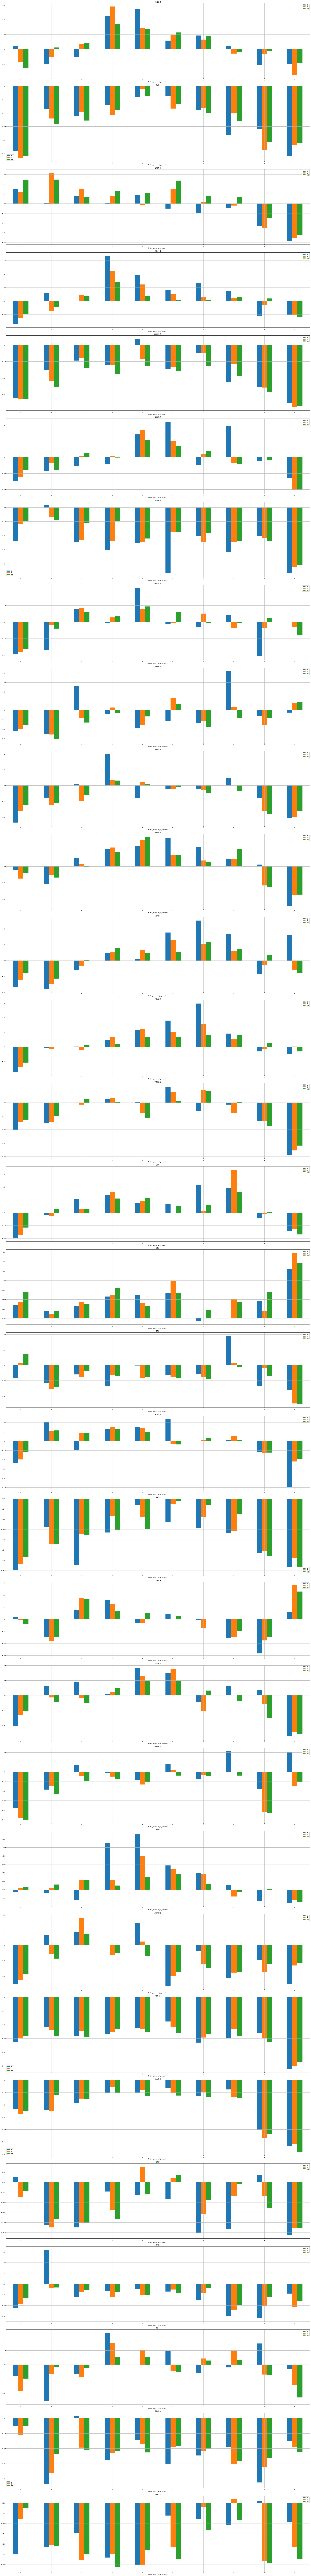

In [395]:
industries = by_industry['group_return_summary'].index.levels[0].unique()
fig, ax = plt.subplots(nrows=len(industries), ncols=1, figsize = (30, 8*len(industries)))
ax = ax.flatten()
for industry, axx in zip(industries, ax):
    by_industry['group_return_summary'].round(3)['Annual_return'].loc[industry].plot.bar(rot = 45, grid=True, ax = axx, title = industry)
fig.tight_layout()

按市值分层收益情况

In [398]:
by_mv['group_return_summary'].round(3)

Type                              Annual_return               Annual_vol               Annual_MDD               Mean_ret              
                                             1D     5D    10D         1D     5D    10D         1D     5D    10D       1D     5D    10D
mv_quantile factor_quantile_by_mv                                                                                                     
Small       0                            -0.093 -0.068 -0.056      0.300  0.144  0.103     -0.350 -0.314 -0.282   -0.000 -0.000 -0.000
            1                             0.258  0.185  0.109      0.287  0.136  0.095     -0.262 -0.242 -0.225    0.001  0.004  0.006
            2                             0.283  0.221  0.147      0.287  0.134  0.094     -0.243 -0.224 -0.195    0.001  0.005  0.007
            3                             0.168  0.156  0.139      0.285  0.134  0.090     -0.243 -0.220 -0.185    0.001  0.004  0.007
            4                             0.210  0.180  0.123      0.278  0.130  0.089     -0.227 -0.206 -0.184    0.001  0.004  0.006
            5                             0.228  0.171  0.130      0.280  0.129  0.089     -0.210 -0.196 -0.182    0.001  0.004  0.006
            6                             0.131  0.122  0.078      0.285  0.128  0.089     -0.228 -0.192 -0.186    0.001  0.003  0.005
            7                             0.045  0.079  0.080      0.287  0.129  0.089     -0.253 -0.208 -0.180    0.000  0.002  0.005
            8                             0.078  0.033  0.036      0.287  0.131  0.089     -0.234 -0.208 -0.183    0.000  0.001  0.003
            9                            -0.186 -0.169 -0.179      0.306  0.140  0.096     -0.281 -0.267 -0.253   -0.001 -0.003 -0.006
Medium      0                            -0.205 -0.166 -0.153      0.293  0.143  0.102     -0.376 -0.334 -0.308   -0.001 -0.003 -0.005
            1                            -0.177 -0.169 -0.153      0.290  0.141  0.098     -0.360 -0.324 -0.290   -0.001 -0.003 -0.005
            2                            -0.064 -0.059 -0.061      0.268  0.132  0.093     -0.326 -0.285 -0.253   -0.000 -0.000 -0.001
            3                            -0.041 -0.016 -0.053      0.263  0.124  0.086     -0.294 -0.244 -0.231   -0.000  0.000 -0.001
            4                             0.042 -0.006 -0.029      0.252  0.120  0.084     -0.233 -0.221 -0.206    0.000  0.001  0.000
            5                             0.006 -0.043 -0.037      0.252  0.117  0.083     -0.250 -0.223 -0.208    0.000 -0.000 -0.000
            6                             0.001  0.026  0.032      0.253  0.124  0.085     -0.242 -0.223 -0.197    0.000  0.001  0.003
            7                            -0.128 -0.074 -0.042      0.266  0.128  0.089     -0.267 -0.235 -0.210   -0.000 -0.001 -0.000
            8                            -0.211 -0.212 -0.205      0.288  0.140  0.101     -0.324 -0.289 -0.270   -0.001 -0.004 -0.007
            9                            -0.350 -0.360 -0.362      0.305  0.144  0.102     -0.394 -0.358 -0.336   -0.002 -0.008 -0.016
Big         0                            -0.287 -0.269 -0.237      0.258  0.124  0.089     -0.357 -0.310 -0.290   -0.001 -0.005 -0.009
            1                            -0.299 -0.277 -0.229      0.260  0.125  0.087     -0.359 -0.327 -0.292   -0.001 -0.006 -0.009
            2                            -0.218 -0.199 -0.201      0.264  0.118  0.083     -0.336 -0.281 -0.257   -0.001 -0.004 -0.008
            3                            -0.174 -0.182 -0.171      0.240  0.113  0.080     -0.316 -0.286 -0.263   -0.001 -0.003 -0.006
            4                            -0.096 -0.088 -0.082      0.216  0.102  0.072     -0.259 -0.235 -0.214   -0.000 -0.001 -0.002
            5                            -0.067 -0.069 -0.077      0.205  0.089  0.066     -0.222 -0.193 -0.192   -0.000 -0.001 -0.002
            6                            -0.147 -0.075 -0.072      0.223  0.104  0.07

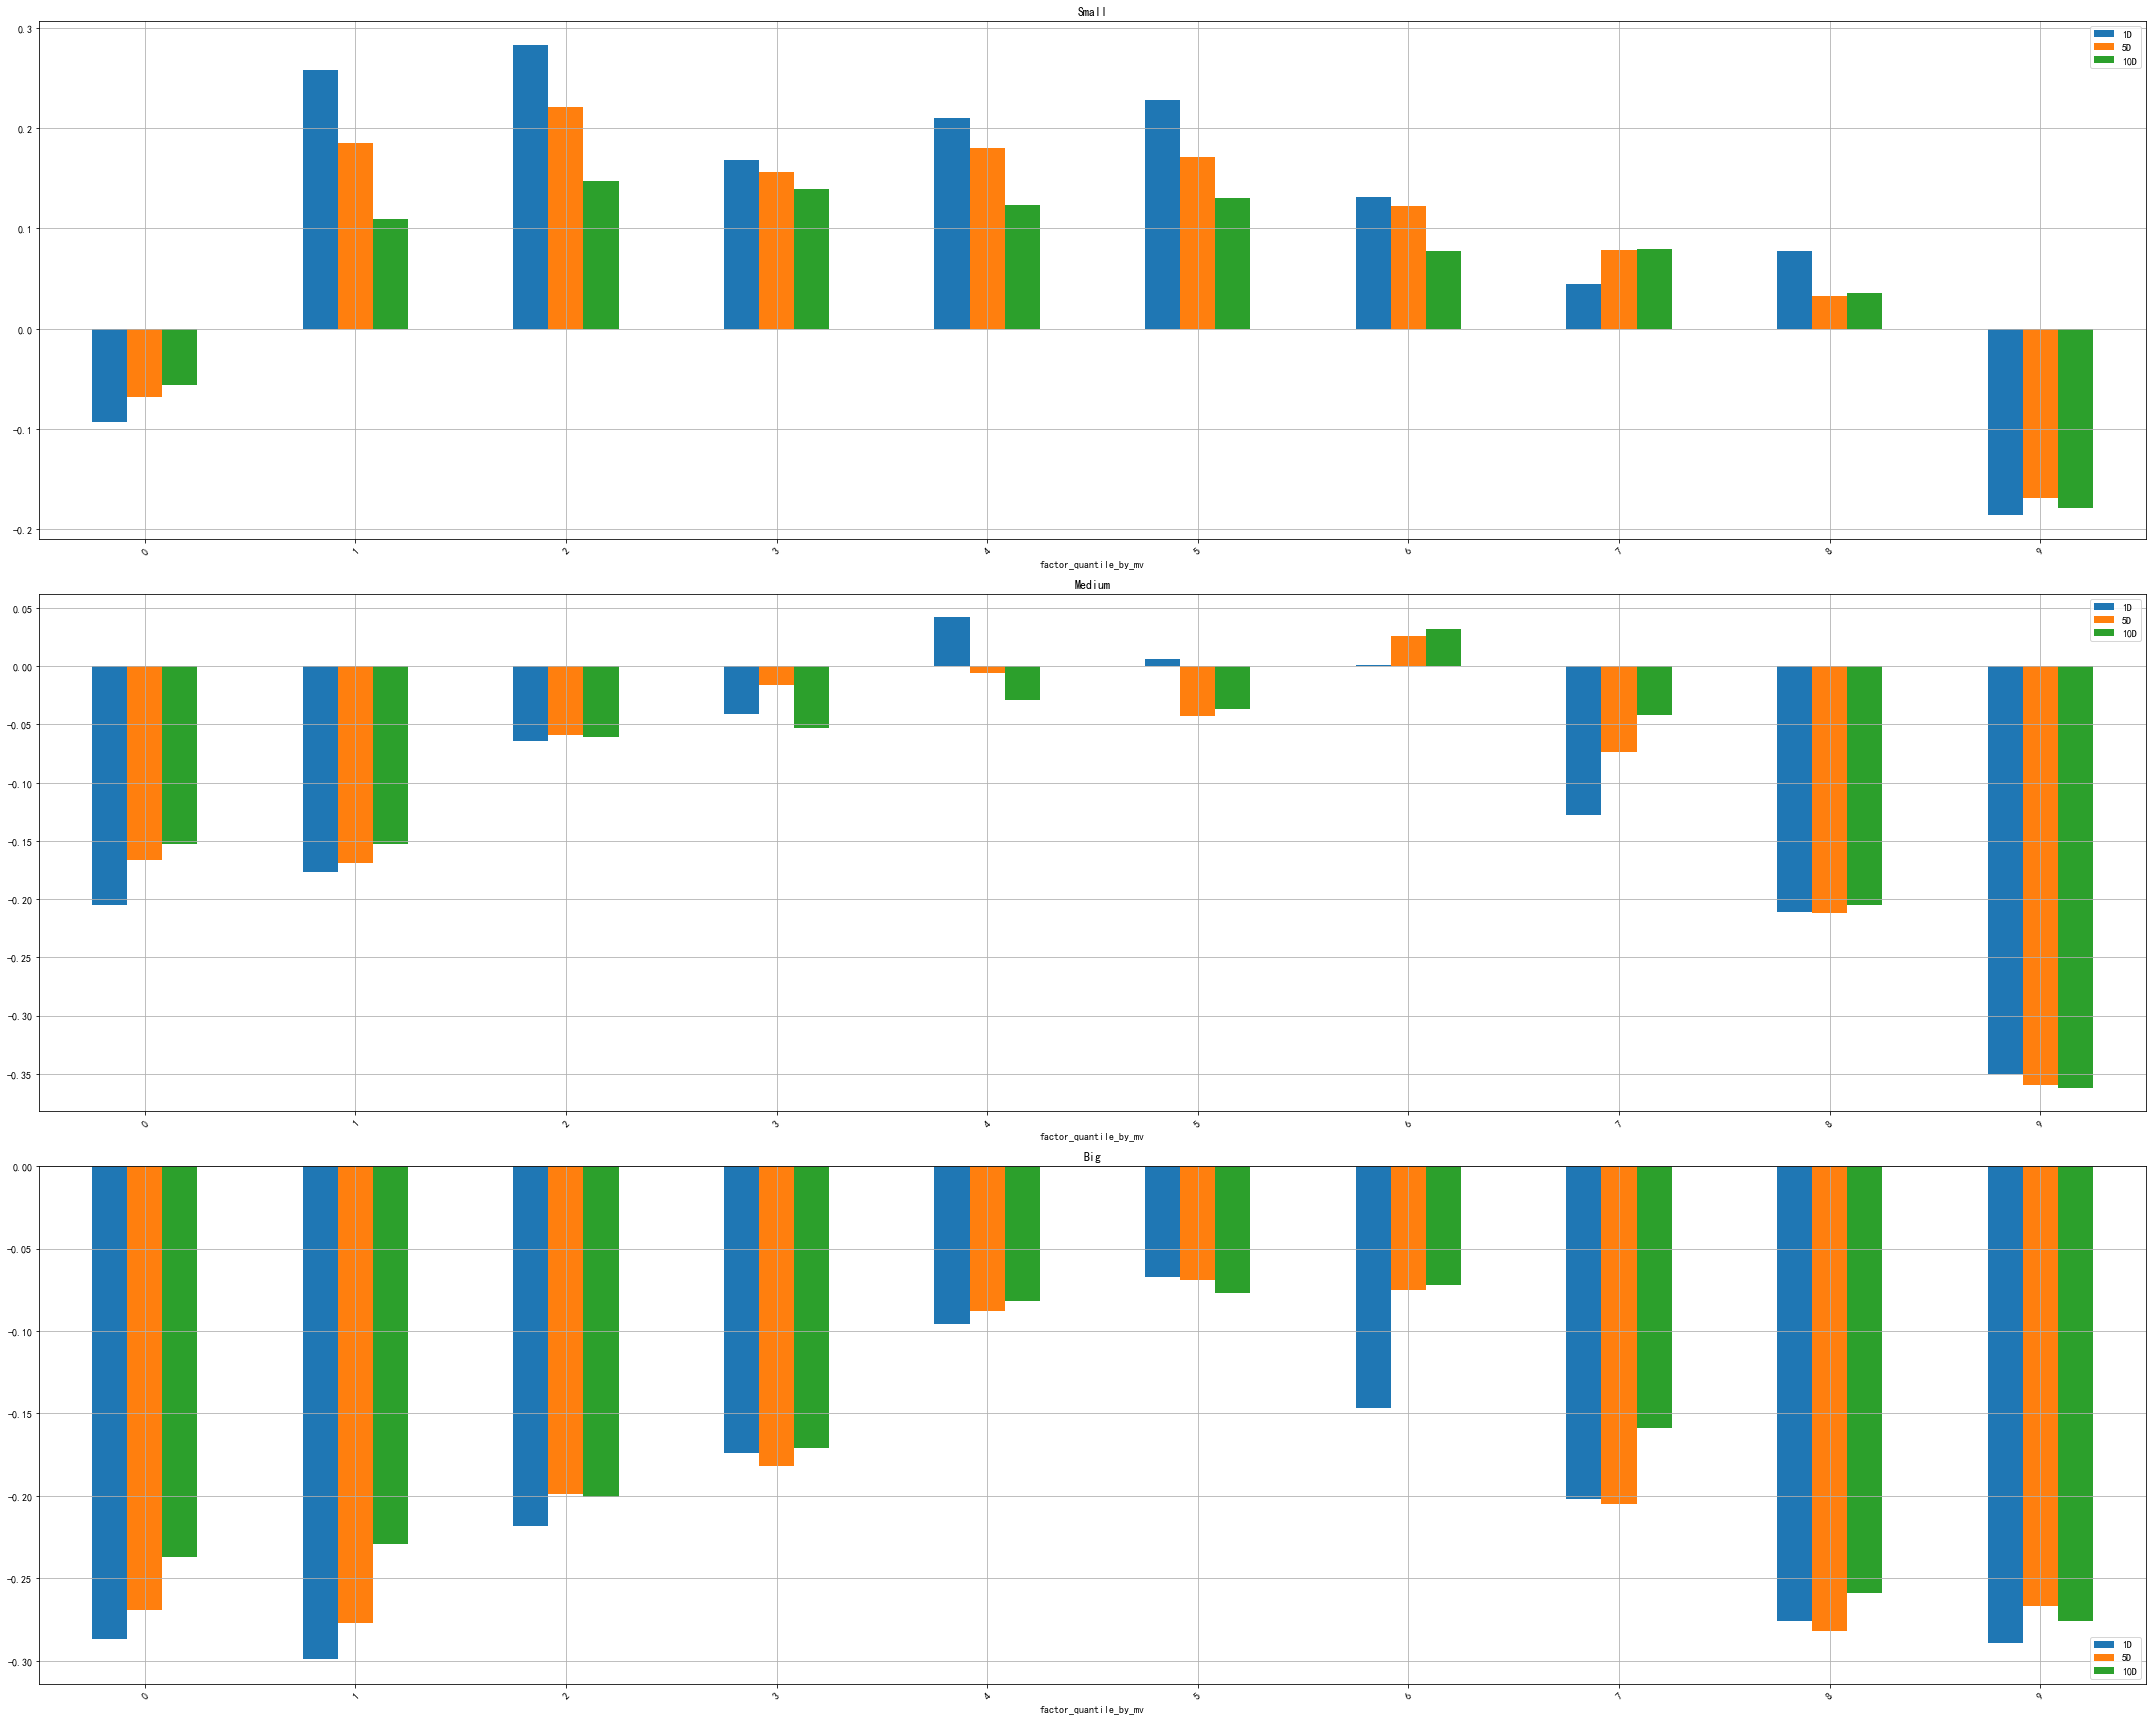

In [399]:
industries = by_mv['group_return_summary'].index.levels[0].unique()
fig, ax = plt.subplots(nrows=len(industries), ncols=1, figsize = (30, 8*len(industries)))
ax = ax.flatten()
for industry, axx in zip(industries, ax):
    by_mv['group_return_summary'].round(3)['Annual_return'].loc[industry].plot.bar(rot = 45, grid=True, ax = axx, title = industry)
fig.tight_layout()